In [22]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

freedom_data = 'starting_data/freedom.csv'
happiness_data = 'starting_data/happiness.csv'
kaggle_data = 'starting_data/kaggle.csv'

freedom_df = pd.read_csv(freedom_data)
happiness_df = pd.read_csv(happiness_data)

kaggle_df = pd.read_csv(kaggle_data)
kaggle_df = kaggle_df.loc[kaggle_df['year'] == 2016]
kaggle_df = kaggle_df[["countries","hf_score"]]
kaggle_df.columns = ["Country", "Human Freedom"]

freedom_df.columns=["Country", "Personal Freedom","Economic Freedom"]

freedom_and_happiness = pd.merge(freedom_df,happiness_df, on="Country")
freedom_and_happiness = pd.merge(freedom_and_happiness,kaggle_df, on="Country")

freedom_and_happiness["Happiness score"] = round(freedom_and_happiness["Happiness score"],2)
freedom_and_happiness["Human Freedom"] = round(freedom_and_happiness["Human Freedom"],2)


freedom_and_happiness.head()


,Country,Personal Freedom,Economic Freedom,Happiness score,Human Freedom
0,Netherlands,9.40,7.71,7.49,8.55
1,Norway,9.34,7.60,7.55,8.47
2,Sweden,9.33,7.44,7.34,8.39
3,Denmark,9.33,7.77,7.60,8.55
4,Finland,9.29,7.65,7.77,8.47


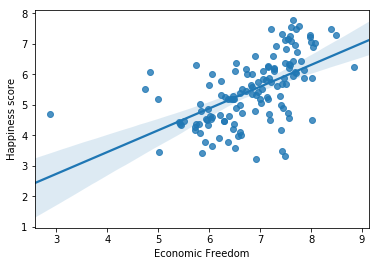

In [23]:
economic_freedom_and_happiness = sns.regplot (x="Economic Freedom", y="Happiness score", data= freedom_and_happiness)

figure = economic_freedom_and_happiness.get_figure()    
figure.savefig('economic_freedom_and_happiness.png', dpi=400)

In [24]:
economic_freedom = freedom_and_happiness["Economic Freedom"]
happiness_score = freedom_and_happiness["Happiness score"]

stats.ttest_ind(economic_freedom, happiness_score , equal_var=False)

Ttest_indResult(statistic=11.181184934123605, pvalue=7.366160171640477e-24)

In [25]:
df = pd.DataFrame(freedom_and_happiness, columns=["Happiness score"])
target = pd.DataFrame(freedom_and_happiness, columns=["Economic Freedom"])

X = df["Happiness score"]
y = target["Economic Freedom"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Economic Freedom   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     4998.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          2.26e-107
Time:                        21:18:28   Log-Likelihood:                -204.02
No. Observations:                 134   AIC:                             410.0
Df Residuals:                     133   BIC:                             412.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Happiness score     1.2170      0.017     70.695      0.000       1.183       1.251
==============================================================================
Omnibus:                        2.804   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                2.447
Skew:                           0.181   Prob(JB):                        0.294
Kurtosis:                       3.554   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

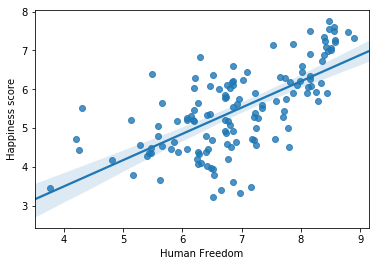

In [26]:
human_freedom_and_happiness = sns.regplot (x="Human Freedom", y="Happiness score", data= freedom_and_happiness)

figure = human_freedom_and_happiness.get_figure()    
figure.savefig('human_freedom_and_happiness.png', dpi=400)

In [27]:
human_freedom = freedom_and_happiness["Human Freedom"]
happiness_score = freedom_and_happiness["Happiness score"]

stats.ttest_ind(human_freedom, happiness_score , equal_var=False)

Ttest_indResult(statistic=10.93475997764812, pvalue=3.1540410014623624e-23)

In [28]:
df = pd.DataFrame(freedom_and_happiness, columns=["Happiness score"])
target = pd.DataFrame(freedom_and_happiness, columns=["Personal Freedom"])

X = df["Happiness score"]
y = target["Personal Freedom"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Personal Freedom   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     4408.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          7.58e-104
Time:                        21:18:30   Log-Likelihood:                -217.66
No. Observations:                 134   AIC:                             437.3
Df Residuals:                     133   BIC:                             440.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Happiness score     1.2655      0.019     66.394      0.000       1.228       1.303
==============================================================================
Omnibus:                        4.307   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                3.753
Skew:                          -0.371   Prob(JB):                        0.153
Kurtosis:                       3.349   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""